### import libraries


In [16]:
import torch
from lightglue import LightGlue, SuperPoint, DISK
from lightglue.utils import load_image_crop, rbd, load_image, read_image
from lightglue import viz2d
from FNCs import get_key_by_value, replace_key, tensor_to_tuple, frame_exists, numpy_image_to_torch, load_data_image_crop
from AlgoFCN import FeatureTracker
from pathlib import Path

import os
import torch
# from torch.utils.data import Dataset, DataLoader
# from torchvision.io import read_image
# from torchvision.transforms import ToTensor
# import pandas as pd
from tqdm import tqdm

import os
import glob
import numpy as np
import cv2
import time

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os
import glob



### inits

In [17]:
address = '/usr/mvl2/ksgh2/Documents/projects/VOT/Datasets/data/Brd/'
image_pathes = glob.glob(address +  '*.png')
tracker = FeatureTracker(ftExtractor = 'aliked', mx_keypoints = 2048, desired_device = 3)
plottingFrames = []
desRec = None

#### Algorithm

In [18]:
for idx, imagePath in tqdm(enumerate(image_pathes)):
        __cpTracks, __kpMvmt, image_cv2, _frmTracks = tracker.process_frame(imagePath, idx, desRec, isOnline = False)
        cvFrame = tracker.update_cvFrame(__cpTracks, image_cv2, _frmTracks, desRec, _isOnline = False)
        plottingFrames.append(cvFrame)
        # if (idx > 20):
        #         break

# tracker.frame_keypoints[2]


901it [03:47,  3.97it/s]


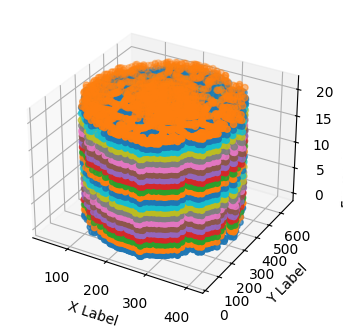

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Make plot interactive with mouse
plt.subplots_adjust(bottom=0.25)
for i, (frameIdx, keyPointList) in enumerate(tracker.frame_keypoints.items()):
    xs = [point[0] for point in keyPointList]  # Extract all x coordinates
    ys = [point[1] for point in keyPointList]  # Extract all y coordinates
    zs = [i] * len(keyPointList)

    ax.scatter(xs, ys, zs)  # Plot the points for this frame 
# # Loop through each frame and plot
# for z, frame in enumerate(frames):
#     xs = [point[0] for point in frame]  # Extract all x coordinates
#     ys = [point[1] for point in frame]  # Extract all y coordinates
#     zs = [z] * len(frame)  # Create a list of z coordinates, all the same for this frame
    
#     ax.scatter(xs, ys, zs)  # Plot the points for this frame

# Set labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Frame Number/Depth')

plt.show()

In [20]:
import csv

# Assuming tracker.frame_keypoints is available and contains the data
# Replace tracker.frame_keypoints with your actual data source if different

with open('feature_points.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    for frameIdx, keyPointList in tracker.frame_keypoints.items():
        for point in keyPointList:
            x = point[0]
            y = point[1]
            z = frameIdx  # Assuming frameIdx is the z value you want
            csvwriter.writerow([x, y, z])

In [23]:
len(tracker.frame_keypoints)

901

### Creating Video

In [24]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use 'mp4v' for .mp4 format

# Use the shape of the first image to get the frame size (width, height)
frame_size = (plottingFrames[0].shape[1], plottingFrames[0].shape[0]) 

# Create a VideoWriter object. Adjust FPS to your liking.
out = cv2.VideoWriter('root_output_video.mp4', fourcc, 8.0, frame_size)

for i in range(len(plottingFrames)):
    # Write the frame to the video
    out.write(plottingFrames[i])

# Release everything when job is finished
out.release()

# Optionally, display a message
print("The video was successfully saved!")

The video was successfully saved!


### Download OASIS dataset

In [7]:
# !wget https://download.nrg.wustl.edu/data/oasis_cross-sectional_disc1.tar.gz
import tarfile
import os

tar_file_path = 'oasis_cross-sectional_disc1.tar.gz'
output_dir = '/usr/mvl2/ksgh2/Documents/projects/VOT/Datasets/data/OASIS/'

with tarfile.open(tar_file_path, 'r:gz') as tar:
    tar.extractall(path=output_dir)

In [9]:
import subprocess

def decompress_file_z(file_path):
    try:
        subprocess.run(['uncompress', file_path], check=True)
        print(f"File {file_path} decompressed.")
    except subprocess.CalledProcessError as e:
        print(f"Failed to decompress {file_path}: {e}")

In [10]:
decompress_file_z("a_vm1002.raw.Z")

File a_vm1002.raw.Z decompressed.


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def load_and_plot_image(file_path, width, height, dtype=np.uint8):
    # Read the raw image data
    image = np.fromfile(file_path, dtype=dtype)

     # Calculate the height based on the total size and known width
    total_elements = image.size
    height = total_elements // width
    
    # Reshape the flat array into the correct image shape
    image = image.reshape((height, width))

    # Display the image
    plt.imshow(image, cmap='gray')  # Use appropriate colormap for your data
    plt.show()

# Example usage
decompressed_file_path = 'a_vm1002.raw'  # Adjust based on your decompression result
load_and_plot_image(decompressed_file_path, 2734, 1, np.uint8)


ValueError: cannot reshape array of size 7471104 into shape (2732,2734)

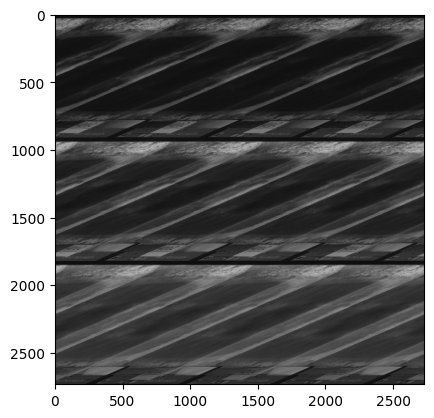

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Replace 'path_to_your_file.raw' with your actual file path
file_path = 'a_vm1002.raw'

# Assuming you know the data type (e.g., 'uint16', 'float32') but not the dimensions
data_type = np.uint8  # Change this according to your data type

# Read the raw file
with open(file_path, 'rb') as file:
    raw_data = np.fromfile(file, dtype=data_type)

# Assuming you don't know the dimensions but it's a square image
# Find the nearest square for the number of elements
dim = int(np.sqrt(raw_data.size))

# Reshape the data to a 2D array (image)
image_data = raw_data[:dim*dim].reshape((dim, dim))

# Display the image
plt.imshow(image_data, cmap='gray')
plt.show()